# Invert Omega equation using SOR method
**07 April 2022 by MiniUFO, Yuan Zhao, and Lei Liu**

---
[TOC]

---


## 1. Introduction
Quasi-geostrophic omega ($\omega$) equation is a classical diagnostic model valid at synoptic- to large-scales away from equator and the poles.  In atmospheric context, $\omega=dp/dt$ means the vertical motion ($Pa/s$) in pressure- ($p$-) coordinates.  In oceanic context, it recovers the vertical motion ($m/s$) in the depth- ($z$-) coordinates as $w$ .

The QG-omega equation is derived from the QG approximation.  Also, it is a 3D equation that involves derivatives along three spatial dimentions ($x,y,z$).  Therefore, it is somewhat complicated than the 2D inverse problems.  Traditionally, the forcing function on the rhs of the equation contains two terms.  As a result, this equation is useful in diagnosting the contributions to the vertical motion from the two terms, which respresent diferent physical processes.


## 2. Theory
### 2.1 Derivation of the QG omega equation
Here the derivation of the QG omega equation is briefly reviewed.  The start point, in the atmospheric context, is the primitive equation set in spherical-pressure coordinates:
>$$
\begin{align}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}+\omega\frac{\partial u}{\partial p}&=-\frac{\partial \Phi}{\partial x}+fv+\frac{uv\tan\phi}{a}+F_{\lambda} \tag{1}\\
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}+\omega\frac{\partial v}{\partial p}&=-\frac{\partial \Phi}{\partial y}-fu-\frac{u^2\tan\phi}{a}+F_{\phi} \tag{2}\\
\frac{\partial \Phi}{\partial p}&=-\frac{R\pi}{p}\theta\tag{3}\\
\frac{\partial u}{\partial x}+\frac{\partial v}{\partial y}+\frac{\partial \omega}{\partial p}&=0\tag{4}\\
\frac{\partial \theta}{\partial t}+u\frac{\partial \theta}{\partial x}+v\frac{\partial \theta}{\partial y}+\omega\frac{\partial \theta}{\partial p}&=\dot\theta \tag{5}
\end{align}
$$

where $\partial x=a\cos\phi\partial \lambda$ and $\partial y=a\partial\phi$ are the short-hands.  The QG approximations are:
1. define the geostrophic flow as $\mathbf{v_g}=f^{-1}\hat\nabla\Phi$, where $\hat\nabla\equiv(-\partial/\partial y, \partial/\partial x)$ is the 90° anti-clockwise rotation of $\nabla\equiv(\partial/\partial x, \partial/\partial y)$;
2. introduce geostrophic vorticity $\zeta_g=\hat\nabla\cdot\mathbf{v_g}=\hat\nabla^2\Phi=\nabla^2\Phi$;
3. decompose the full flow into geostrophic and ageostrophic components $\mathbf{v}=\mathbf{v_g}+\mathbf{v_a}$ and assume $\mathbf{v_g}\gg\mathbf{v_a}$;
4. momentum advection is accomplished by $\mathbf{v_g}$ i.e., neglect the vertical advection by $\omega$ in the momentum equation [the vertical heat advection in Eq. (5) is retained];
5. neglect the metrics terms in spherical coordinates.

Then we have the QG equation set as:
>$$
\begin{align}
\frac{\partial u_g}{\partial t}+\mathbf{v_g}\cdot\nabla u_g&=fv_a+F_{\lambda} \tag{6}\\
\frac{\partial v_g}{\partial t}+\mathbf{v_g}\cdot\nabla v_g&=-fu_a+F_{\phi} \tag{7}\\
\frac{\partial \Phi}{\partial p}&=-\frac{R\pi}{p}\theta\tag{8}\\
\nabla\cdot\mathbf{v_a}&=-\frac{\partial \omega}{\partial p}\tag{9}\\
\frac{\partial \theta}{\partial t}+\mathbf{v_g}\cdot\nabla \theta&=-\omega\frac{\partial \theta}{\partial p}+\dot\theta \tag{10}
\end{align}
$$

The derivation of the QG omega equation is much clear if 1) the momentum equation is first combined into the vorticity equation, with Eq. (9) to remove the divergence of ageostrophic wind, 2) apply the $\hat\nabla^2$ to both sides of Eq. (8):
>$$
\begin{align}
\frac{\partial \zeta_g}{\partial t}&=-\mathbf{v_g}\cdot\nabla \zeta_g+f\frac{\partial \omega}{\partial p}+\beta v_a+\hat\nabla\cdot\mathbf{F} \tag{11}\\
\hat\nabla^2\frac{\partial \Phi}{\partial p}&=f\frac{\partial \zeta_g}{\partial p}=-\frac{R\pi}{p}\nabla^2\theta\tag{12}\\
\frac{\partial \theta}{\partial t}&=-\mathbf{v_g}\cdot\nabla \theta-\omega\frac{\partial \theta}{\partial p}+\dot\theta \tag{13}
\end{align}
$$

Notice that $\hat\nabla\cdot\mathbf{F}$ is the curl of external forcing.  Then taking $\partial/\partial t$ on both sides of Eq. (12), and using Eqs. (11) and (13) to eliminate the tendency tems, one obtains the QG omega equation:
>$$
\begin{align}
f^2\frac{\partial^2 \omega}{\partial p^2}+\nabla^2(S\omega)&=\frac{R\pi}{p}\nabla^2\left(\mathbf{v_g}\cdot\nabla\theta-\dot\theta\right)\\
&+f\frac{\partial}{\partial p}\left(\mathbf{v_g}\cdot\nabla\zeta_g-\beta v_a-\hat\nabla\cdot\mathbf{F}\right) \tag{14}\\
\end{align}
$$

where $S=-\frac{R\pi}{p}\frac{\partial \theta}{\partial p}$ is the static stability or buoyancy frequency.

### 2.1 Traditional form
The traditional form involves further assumptions of adiabatic ($\dot\theta=0$) and invisid ($\mathbf{F}=0$) dynamics, $f$-plane approximation ($f=f_0$), and that the static stability $S$ does not vary horizontally.  Upon this, the traditional form of QG omega equation is:
>$$
\begin{align}
\left[f^2_0\frac{\partial^2(\cdot)}{\partial p^2}+\nabla^2(S\cdot)\right]\omega&=\frac{R\pi}{p}\nabla^2\left(\mathbf{v_g}\cdot\nabla\theta\right)+f\frac{\partial}{\partial p}\left(\mathbf{v_g}\cdot\nabla\zeta_g\right) \tag{15}\\
\end{align}
$$

For oceanic context, $\theta$ is replaced by buoyancy $b\equiv-\rho g/\rho_0$ (note that $S=\partial b/\partial z$), and the QG-equation is somewhat simplified:
>$$
\begin{align}
L(w)&\equiv\left[\frac{\partial}{\partial z}\left(f^2_0\frac{\partial}{\partial z}\right)+\nabla\cdot(S\nabla)\right]w\tag{...}\\
&=\nabla^2\left(-\mathbf{v_g}\cdot\nabla b\right)+f\frac{\partial}{\partial z}\left(\mathbf{v_g}\cdot\nabla\zeta_g\right) \tag{16}\\
\end{align}
$$

### 2.2 Q-vector form
[Hoskins et al. (1978)](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/qj.49710443903) provided an alternative form of the QG omega equation through manipulating the two forcing terms on the rhs of Eq. (16).  The resulting equation is known as the Q-vector form of the QG omega equation (without diabatic and frictional forcings):
>$$
\begin{align}
L(\omega)&=-2\nabla\cdot \mathbf Q\tag{17}\\
\end{align}
$$

where the Q-vector is defined in atmospheric context as:
>$$
\begin{align}
\mathbf Q&=-\frac{R\pi}{p}\left(\frac{\partial\mathbf V_g}{\partial x}\cdot\nabla \theta,  \quad\frac{\partial\mathbf V_g}{\partial y}\cdot\nabla \theta\right)\tag{18}\\
&=\left(\frac{1}{f}\frac{\partial\hat\nabla\Phi}{\partial x}\cdot\nabla \frac{\partial \Phi}{\partial p},  \quad\frac{1}{f}\frac{\partial\hat\nabla\Phi}{\partial y}\cdot\nabla \frac{\partial \Phi}{\partial p}\right)\tag{18'}\\
\end{align}
$$

and in oceanic context as:
>$$
\begin{align}
\mathbf Q=\left(\frac{\partial\mathbf V_g}{\partial x}\cdot\nabla b,  \quad\frac{\partial\mathbf V_g}{\partial y}\cdot\nabla b\right)\tag{19}\\
\end{align}
$$

The Q-vector form has several advantages over the traditional form:
- Forcing function (Q-vector) is evaluated on **a single vertical level** [see Eq. (18)]. Traditional form requires information at 3 levels to take vertical derivatives.  Note that one can also express Q-vector in terms of geopotential $\Phi$ alone and the QG-omega can be determined by 3D distribution of $\Phi$ completely [Eq. (18')].  But it is not well-defined at the equator because $f$ tends to be zero.
- Forcing function is **Galilean invariant**.
- In the traditional form, adevction between temperature and vorticity usually cancel each other.  In Q-vector form, **no cancellation** problem between forcing terms.  
- Q-vectors can be plotted on geopotential height and temperature maps to obtain representation of forcing for vertical motion, ageostrophic circulation, and frontogenesis.


## 3. Examples
Here we will demonstrate how to use `xinvert` python package to calculate QG vertical motion using gridded data.  The inversion requires a simple calculation of the forcing function, which is not included in `xinvert`.  However, with the help of `xarray`, this is relatively simple.
### 3.1 Global atmospheric example
The first example is the inversion using global atmospheric reanalysis data from JRA (a single timestep).  First, loading the data into `xarray.Dataset`:

In [1]:
import sys
sys.path.append('../../')
import xarray as xr
import numpy as np
from GeoApps.GridUtils import add_latlon_metrics
from GeoApps.ConstUtils import Rd, Cp, omega
from GeoApps.DiagnosticMethods import Dynamics

############ load JRA global reanalysis sample data ############
dset = xr.open_dataset('../Data/atmos3D.nc', decode_times=False)

# for calcuating the forcing function, we need xgcm package
ds, grid = add_latlon_metrics(dset, dims={'lat':'lat', 'lon':'lon'},
                              boundary={'lat':'extend','lon':'periodic'})

ds['LEV'] = ds['LEV'] * 100

############### calculate basic variables ###############
dyn = Dynamics(ds, grid, arakawa='A')

T   = ds.T
U   = ds.U
V   = ds.V
W   = ds.Omega
H   = ds.hgt
p   = ds.LEV
Psfc= ds.psfc

f    = 2*omega*np.sin(np.deg2rad(ds.lat)) # Coriolis parameter
th   = T * (100000 / p)**(Rd/Cp)   # potential temperature
TH   = grid.average(th, ['Y','X']) # domain-mean
vor  = dyn.curl(U,V)               # vorticity to approx. geostrophic vorticity
dTHdp= TH.differentiate('LEV')
RPiP = (Rd * T / p / TH)
S    = - RPiP * dTHdp              # static stability parameter

################ traditional form of forcings Eq. (15) ################
grdthx, grdthy = dyn.grad(th , ['X', 'Y'])
grdvrx, grdvry = dyn.grad(vor, ['X', 'Y'])

F1 = dyn.Laplacian((U * grdthx + V * grdthy) * RPiP)
F2 = ((U * grdvrx + V * grdvry) * f).differentiate('LEV')

FAll = (F1 + F2)

################# Q-vector form of forcings Eq. (18) #################
ux, uy = dyn.grad(U, ['X', 'Y'])
vx, vy = dyn.grad(V, ['X', 'Y'])

Qx = - RPiP * (ux * grdthx + vx * grdthy)
Qy = - RPiP * (uy * grdthx + vy * grdthy)

FQvec = -2 * dyn.divg((Qx, Qy), dims=['X', 'Y'])

C:\ProgramData\Anaconda3\lib\site-packages\xgcm\grid.py:1868: RuntimeWarning: invalid value encountered in add
  return 0.5 * (data_left + data_right)
C:\ProgramData\Anaconda3\lib\site-packages\xgcm\grid.py:1872: RuntimeWarning: invalid value encountered in subtract
  return data_right - data_left
C:\ProgramData\Anaconda3\lib\site-packages\xgcm\grid.py:1868: RuntimeWarning: invalid value encountered in add
  return 0.5 * (data_left + data_right)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1069: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1090: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1097: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slic

We also prepare to use the surface $\omega$ as the lower boundary condition for the inversion:

In [2]:
#%% prepare lower boundary for inversion
p3D = T-T+p # broadcast

FAll2  =  FAll.where(p<=Psfc)
FQvec2 = FQvec.where(p<=Psfc)

WBC = xr.where(p3D<=Psfc, 0, W).load()

Now inverting for omegas.  Note that the whole inversion requires two variables: the forcing function $F$ and static stability parameter $S$ (which only varies in the vertical).

In [3]:
### inverting ###
from xinvert.xinvert import invert_OmegaEquation

WQG    = invert_OmegaEquation(FAll, S, dims=['LEV', 'lat', 'lon'],
                              BCs=['fixed', 'fixed', 'extend'], tolerance=1e-16)
WQvec  = invert_OmegaEquation(FQvec, S, dims=['LEV', 'lat', 'lon'],
                              BCs=['fixed', 'fixed', 'extend'], tolerance=1e-16)
WQG2   = invert_OmegaEquation(FAll2, S, dims=['LEV', 'lat', 'lon'],
                              BCs=['fixed', 'fixed', 'extend'], tolerance=1e-16, icbc=WBC)
WQvec2 = invert_OmegaEquation(FQvec2, S, dims=['LEV', 'lat', 'lon'],
                              BCs=['fixed', 'fixed', 'extend'], tolerance=1e-16, icbc=WBC)

{} loops 1000 and tolerance is 0.000000e+00
{} loops  922 and tolerance is 0.000000e+00
{} loops 5000 and tolerance is 3.345303e-10
{} loops 5000 and tolerance is 2.005285e-10


Now we can plot the results.  First take a look at the pattern on an upper level.

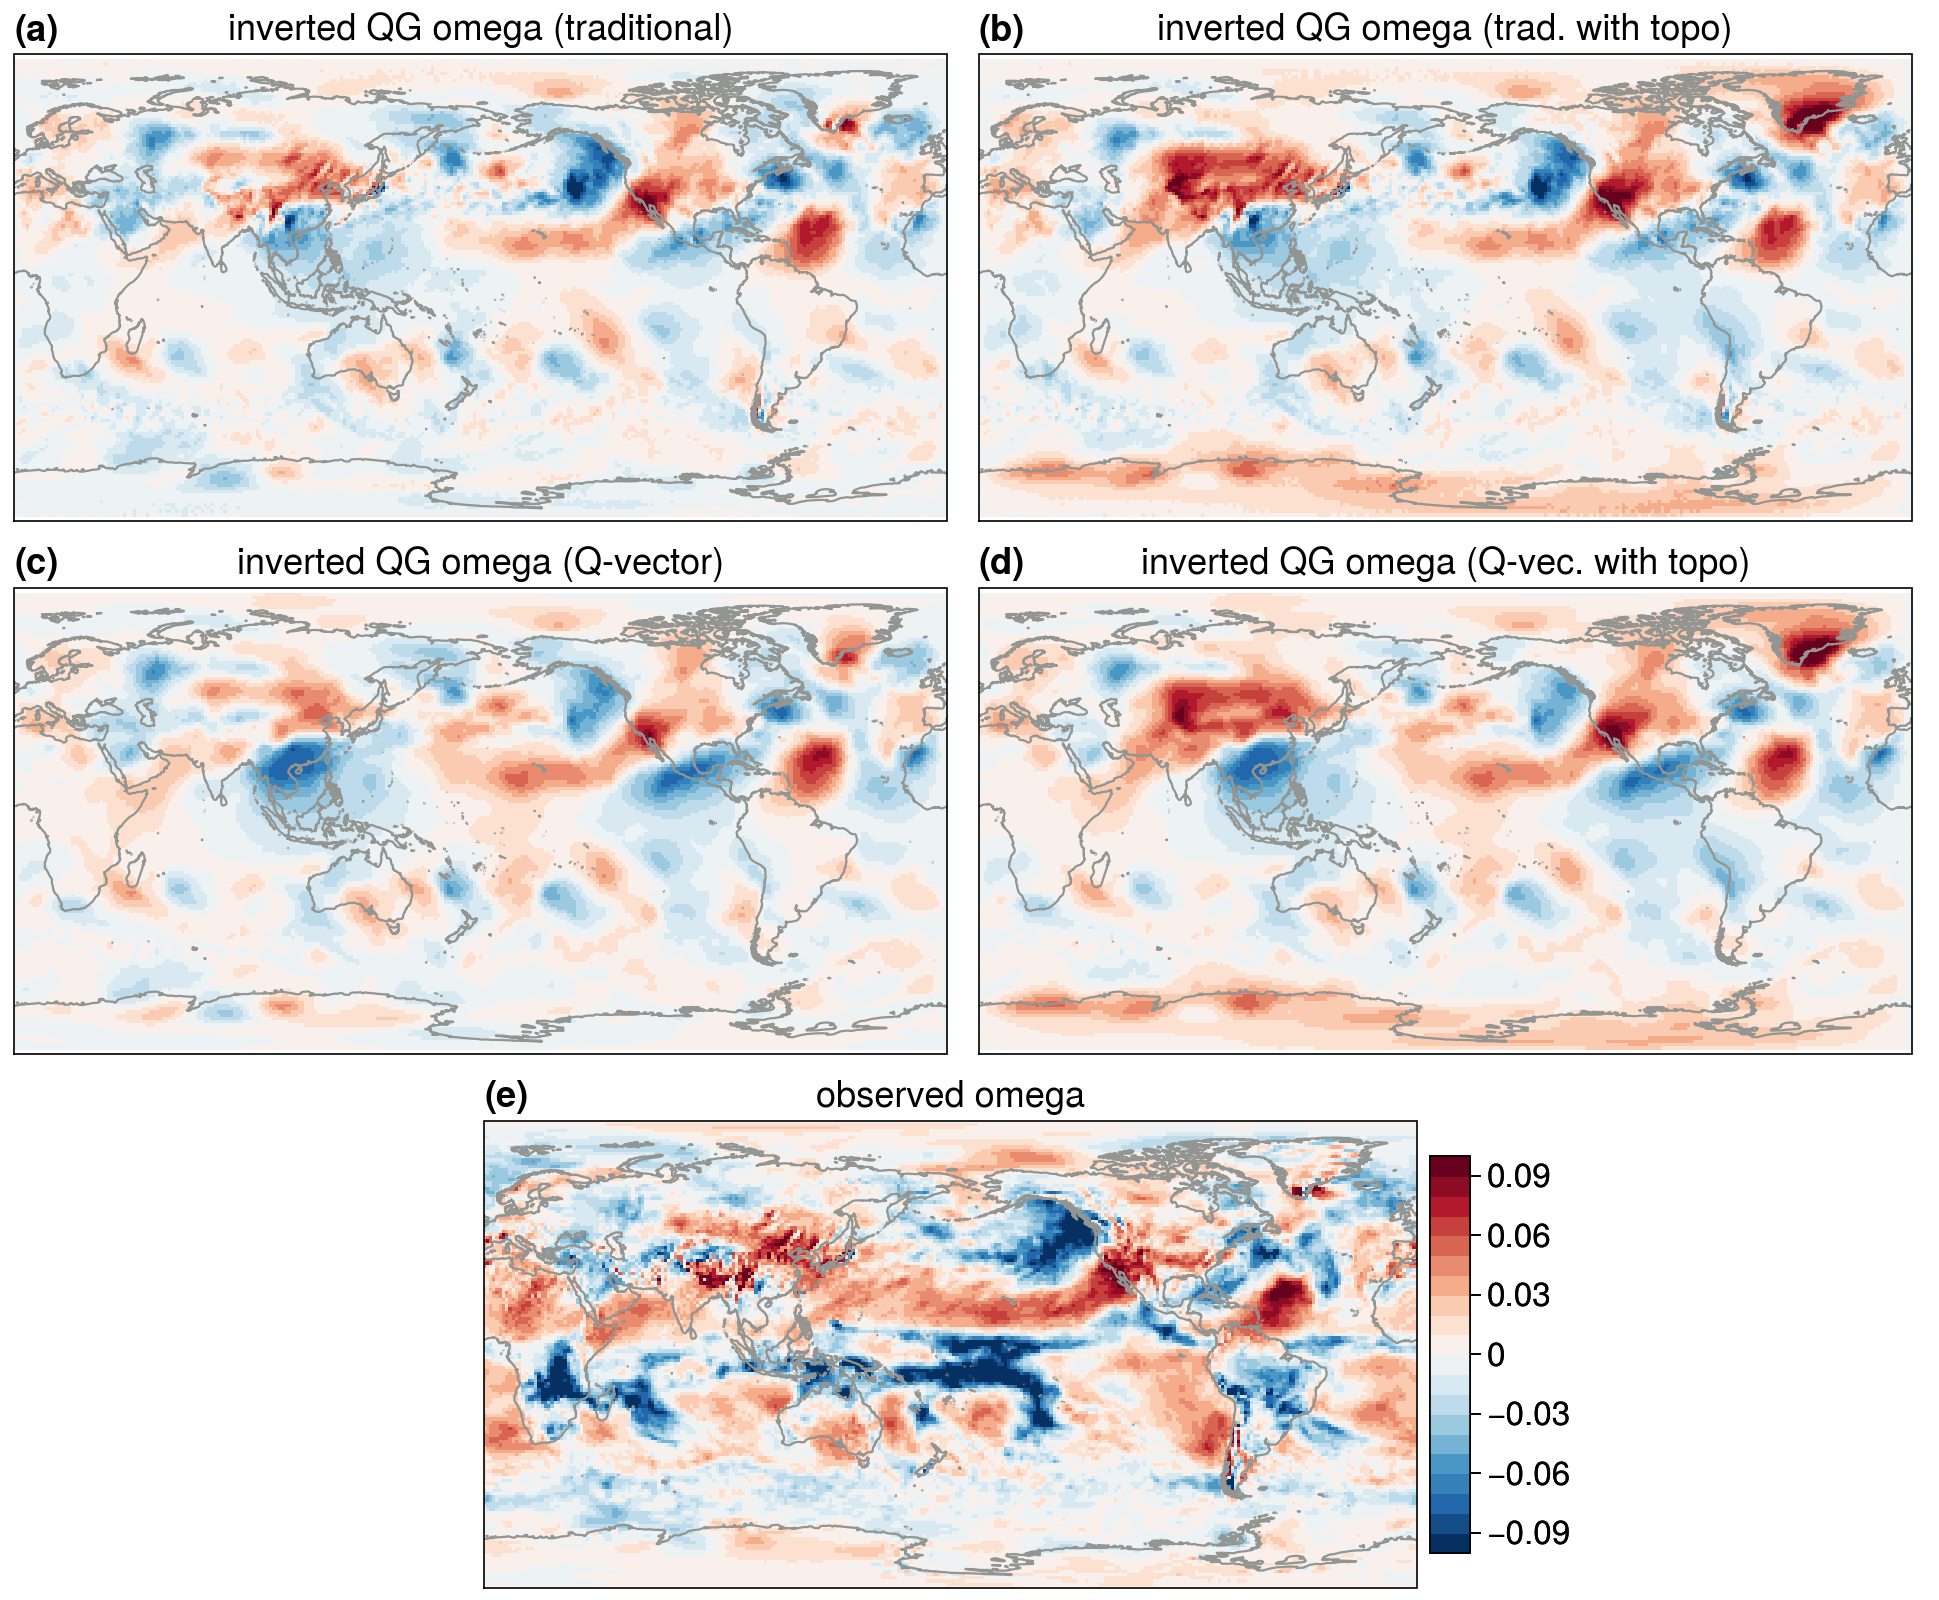

In [4]:
### plot the sum-ups, observed, and difference ###
#%% plot horizontal plane
import proplot as pplt
%matplotlib inline

fontsize = 16
z = 25 # 375 hPa
array = [[1,1,2,2], [3,3,4,4], [0,5,5,0]]

fig, axes = pplt.subplots(array, figsize=(9.7, 8), proj=pplt.Proj('cyl', lon_0=180))

ax = axes[0]
m=ax.pcolormesh(WQG[z], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (traditional)')
ax = axes[1]
m=ax.pcolormesh(WQG2[z], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (trad. with topo)')
ax = axes[2]
m=ax.pcolormesh(WQvec[z], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (Q-vector)')
ax = axes[3]
m=ax.pcolormesh(WQvec2[z], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (Q-vec. with topo)')
ax = axes[4]
m=ax.pcolormesh(W[z], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('observed omega')
ax.colorbar(m, loc='r', cols=(1,2), length=0.85, label='')

axes.format(abc='(a)', coast=True, grid=False, labels=False)

Plot a cross section to demonstrate the difference between different lower boundary conditions.

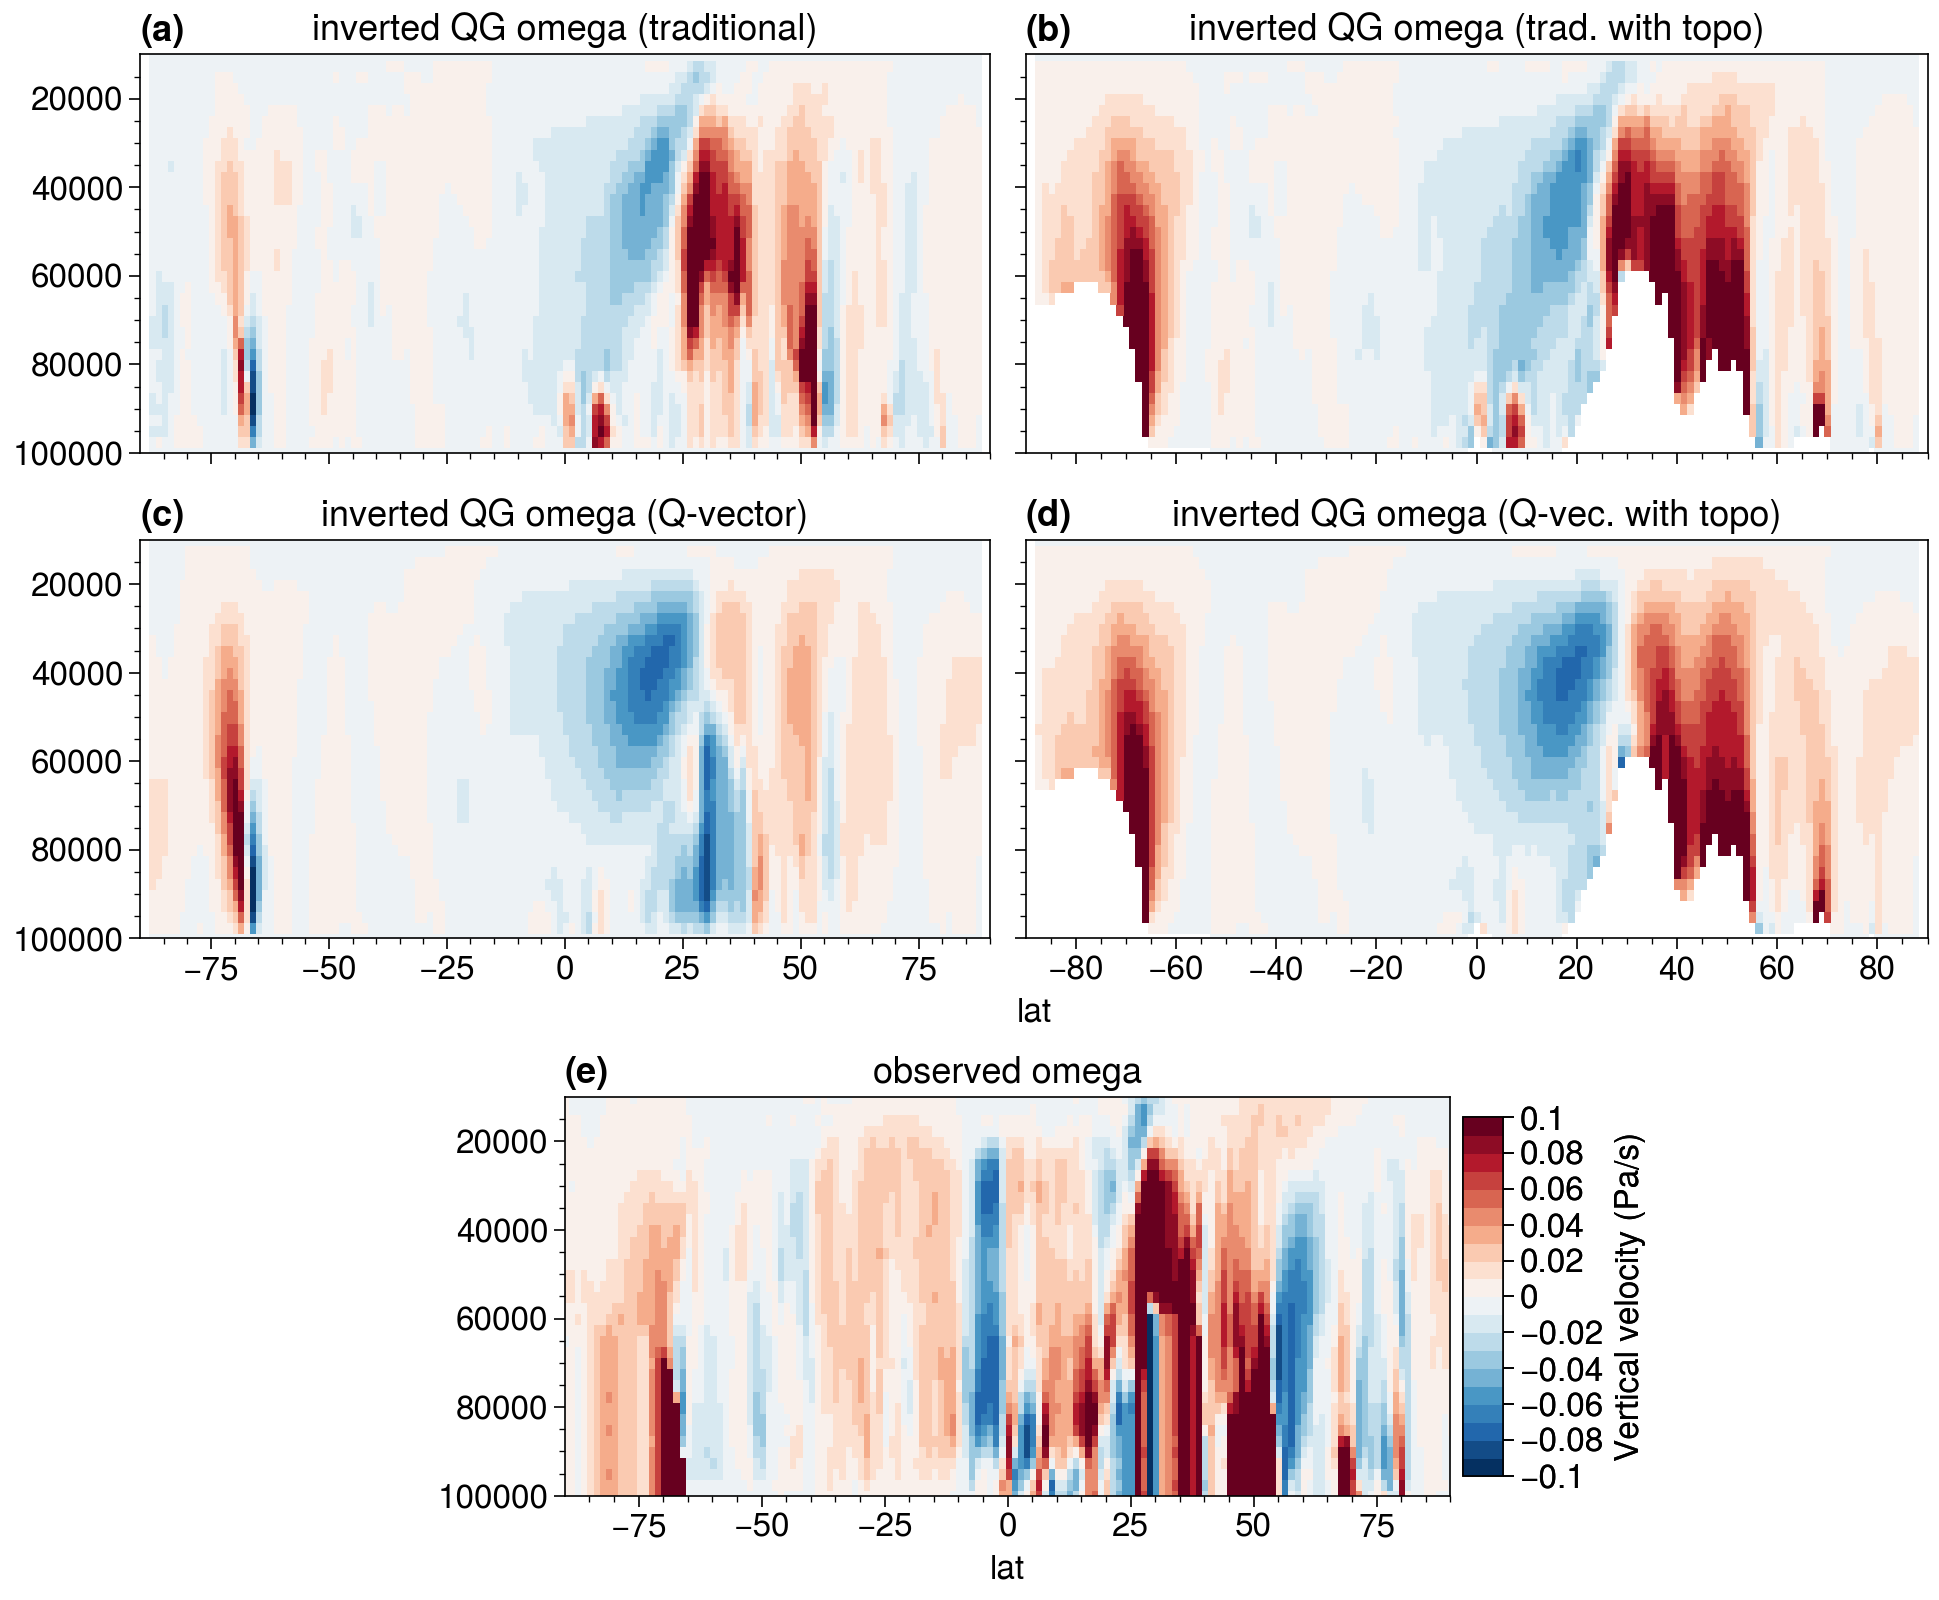

In [5]:
import proplot as pplt

x = 80
fontsize = 16
array = [[1,1,2,2], [3,3,4,4], [0,5,5,0]]

fig, axes = pplt.subplots(array, figsize=(9.7, 8))

ax = axes[0]
m=ax.pcolormesh(WQG[:, :, x], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (traditional)')
ax = axes[1]
m=ax.pcolormesh(WQG2[:, :, x], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (trad. with topo)')
ax = axes[2]
m=ax.pcolormesh(WQvec[:, :, x], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (Q-vector)')
ax = axes[3]
m=ax.pcolormesh(WQvec2[:, :, x], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('inverted QG omega (Q-vec. with topo)')
ax = axes[4]
m=ax.pcolormesh(W[:, :, x], levels=np.linspace(-0.1, 0.1, 21), cmap='RdBu_r')
ax.set_title('observed omega')
ax.colorbar(m, loc='r', length=0.9)

axes.format(abc='(a)', ylim=[100000, 10000], xlim=[-90,90], ylabel='')

It is clear that the solutions forced by traditional and Q-vector forms are similar in general.  Difference may be due to the finite difference schemes.  With lower boundary values close to that of observed one, the inverted omega will match the observed one when approaching the lower boundary.  Maybe we should loop from the top to the bottom, where the upper boundary condition is set to $\omega=0$.  Also, in the tropics, as the forcing term vanished there, the vertical motion is relatively weak.  One needs to add diabatic forcing to the forcing function to produce more similar pattern in the tropics.

### 3.2 Oceanic example
We use the OFES reanalysis data over Kuroshio extension region to demonstrate the application in oceanic context.  This case is well demonstrated in [Liu et al. (2021)](https://journals.ametsoc.org/view/journals/phoc/51/5/JPO-D-20-0152.1.xml).

In [6]:
#%% load converted netcdf from Lei Liu
import sys
sys.path.append('../../')
import numpy as np
import xarray as xr
from GeoApps.GridUtils import add_latlon_metrics
from GeoApps.DiagnosticMethods import Dynamics

ds = xr.open_dataset('I:/Omega/OFES30_20011206_Qian/data.nc',
                     chunks={'lev':6}).astype('f4')

# dset = ds.sel({'lon':slice(143.1, 150.9), 'lat':slice(31.1, 38.9)})
ds['lev'] = -ds['lev'] # Reverse the z-coord. positive direction
                       # This is important for taking vertical derivatives.

Then we calculate the QG forcings according to Eqs. (16) and (19).

In [7]:
#%% calculate QG forcings
from GeoApps.ConstUtils import omega

dset, grid = add_latlon_metrics(ds, dims={'lat':'lat', 'lon':'lon'})

dyn = Dynamics(dset, grid=grid, arakawa='A')

u = ds.u / 100 # change unit from cm/s to m/s
v = ds.v / 100 # change unit from cm/s to m/s
w = ds.w / 100 # change unit from cm/s to m/s

dyn = Dynamics(ds, grid, arakawa='A')

b  = ds.rho * (-9.81/1023)
f  = 2*omega*np.sin(np.deg2rad(ds.lat))
N2 = b.mean(['lat','lon']).load().differentiate('lev').load()

########## traditional form of forcings ##########
bx, by = dyn.grad(b)
zx, zy = dyn.grad(dyn.curl(u, v))

adv_b = u*bx + v*by
adv_z = u*zx + v*zy

Ftrad = dyn.Laplacian(-adv_b) + adv_z.load().differentiate('lev')*f
Ftrad = (xr.where(np.isfinite(Ftrad), Ftrad, np.nan)).load()

############ Q-vector form of forcings ############
ux, uy = dyn.grad(u)
vx, vy = dyn.grad(v)

Qx = ux*bx + vx*by
Qy = uy*bx + vy*by

divQ  = -2 * dyn.divg((Qx, Qy), ['X', 'Y'])
FQvec = xr.where(np.isfinite(divQ), divQ, np.nan).load()

#%% maskout topography
WBC1 = xr.where(np.isnan(Ftrad), 0, w)
WBC2 = xr.where(np.isnan(FQvec), 0, w)

C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1069: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1090: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:1097: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_n
C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
C:\ProgramData\Anaconda3\lib\site-packages\dask\

Then we can perform inversion similarly:

In [9]:
import time
from xinvert.xinvert import invert_OmegaEquation

start = time.time()
W1 = invert_OmegaEquation(Ftrad, N2, dims=['lev', 'lat', 'lon'],
                          BCs=['fixed', 'fixed', 'extend'], mxLoop=500,
                          printInfo=True, debug=False, tolerance=1e-9).load()
W2 = invert_OmegaEquation(FQvec, N2, dims=['lev', 'lat', 'lon'],
                          BCs=['fixed', 'fixed', 'extend'], mxLoop=500,
                          printInfo=True, debug=False, tolerance=1e-9).load()
W1t= invert_OmegaEquation(Ftrad, N2, dims=['lev', 'lat', 'lon'], icbc=WBC1,
                          BCs=['fixed', 'fixed', 'extend'], mxLoop=500,
                          printInfo=True, debug=False, tolerance=1e-9).load()
W2t= invert_OmegaEquation(FQvec, N2, dims=['lev', 'lat', 'lon'], icbc=WBC2,
                          BCs=['fixed', 'fixed', 'extend'], mxLoop=500,
                          printInfo=True, debug=False, tolerance=1e-9).load()
elapsed = time.time() - start
print('time used: ', elapsed)

{} loops  500 and tolerance is 3.202991e-04
{} loops  500 and tolerance is 3.250430e-04
{} loops  500 and tolerance is 2.370018e-06
{} loops  500 and tolerance is 9.642932e-06
time used:  1443.7183575630188


Results can be plotted as:

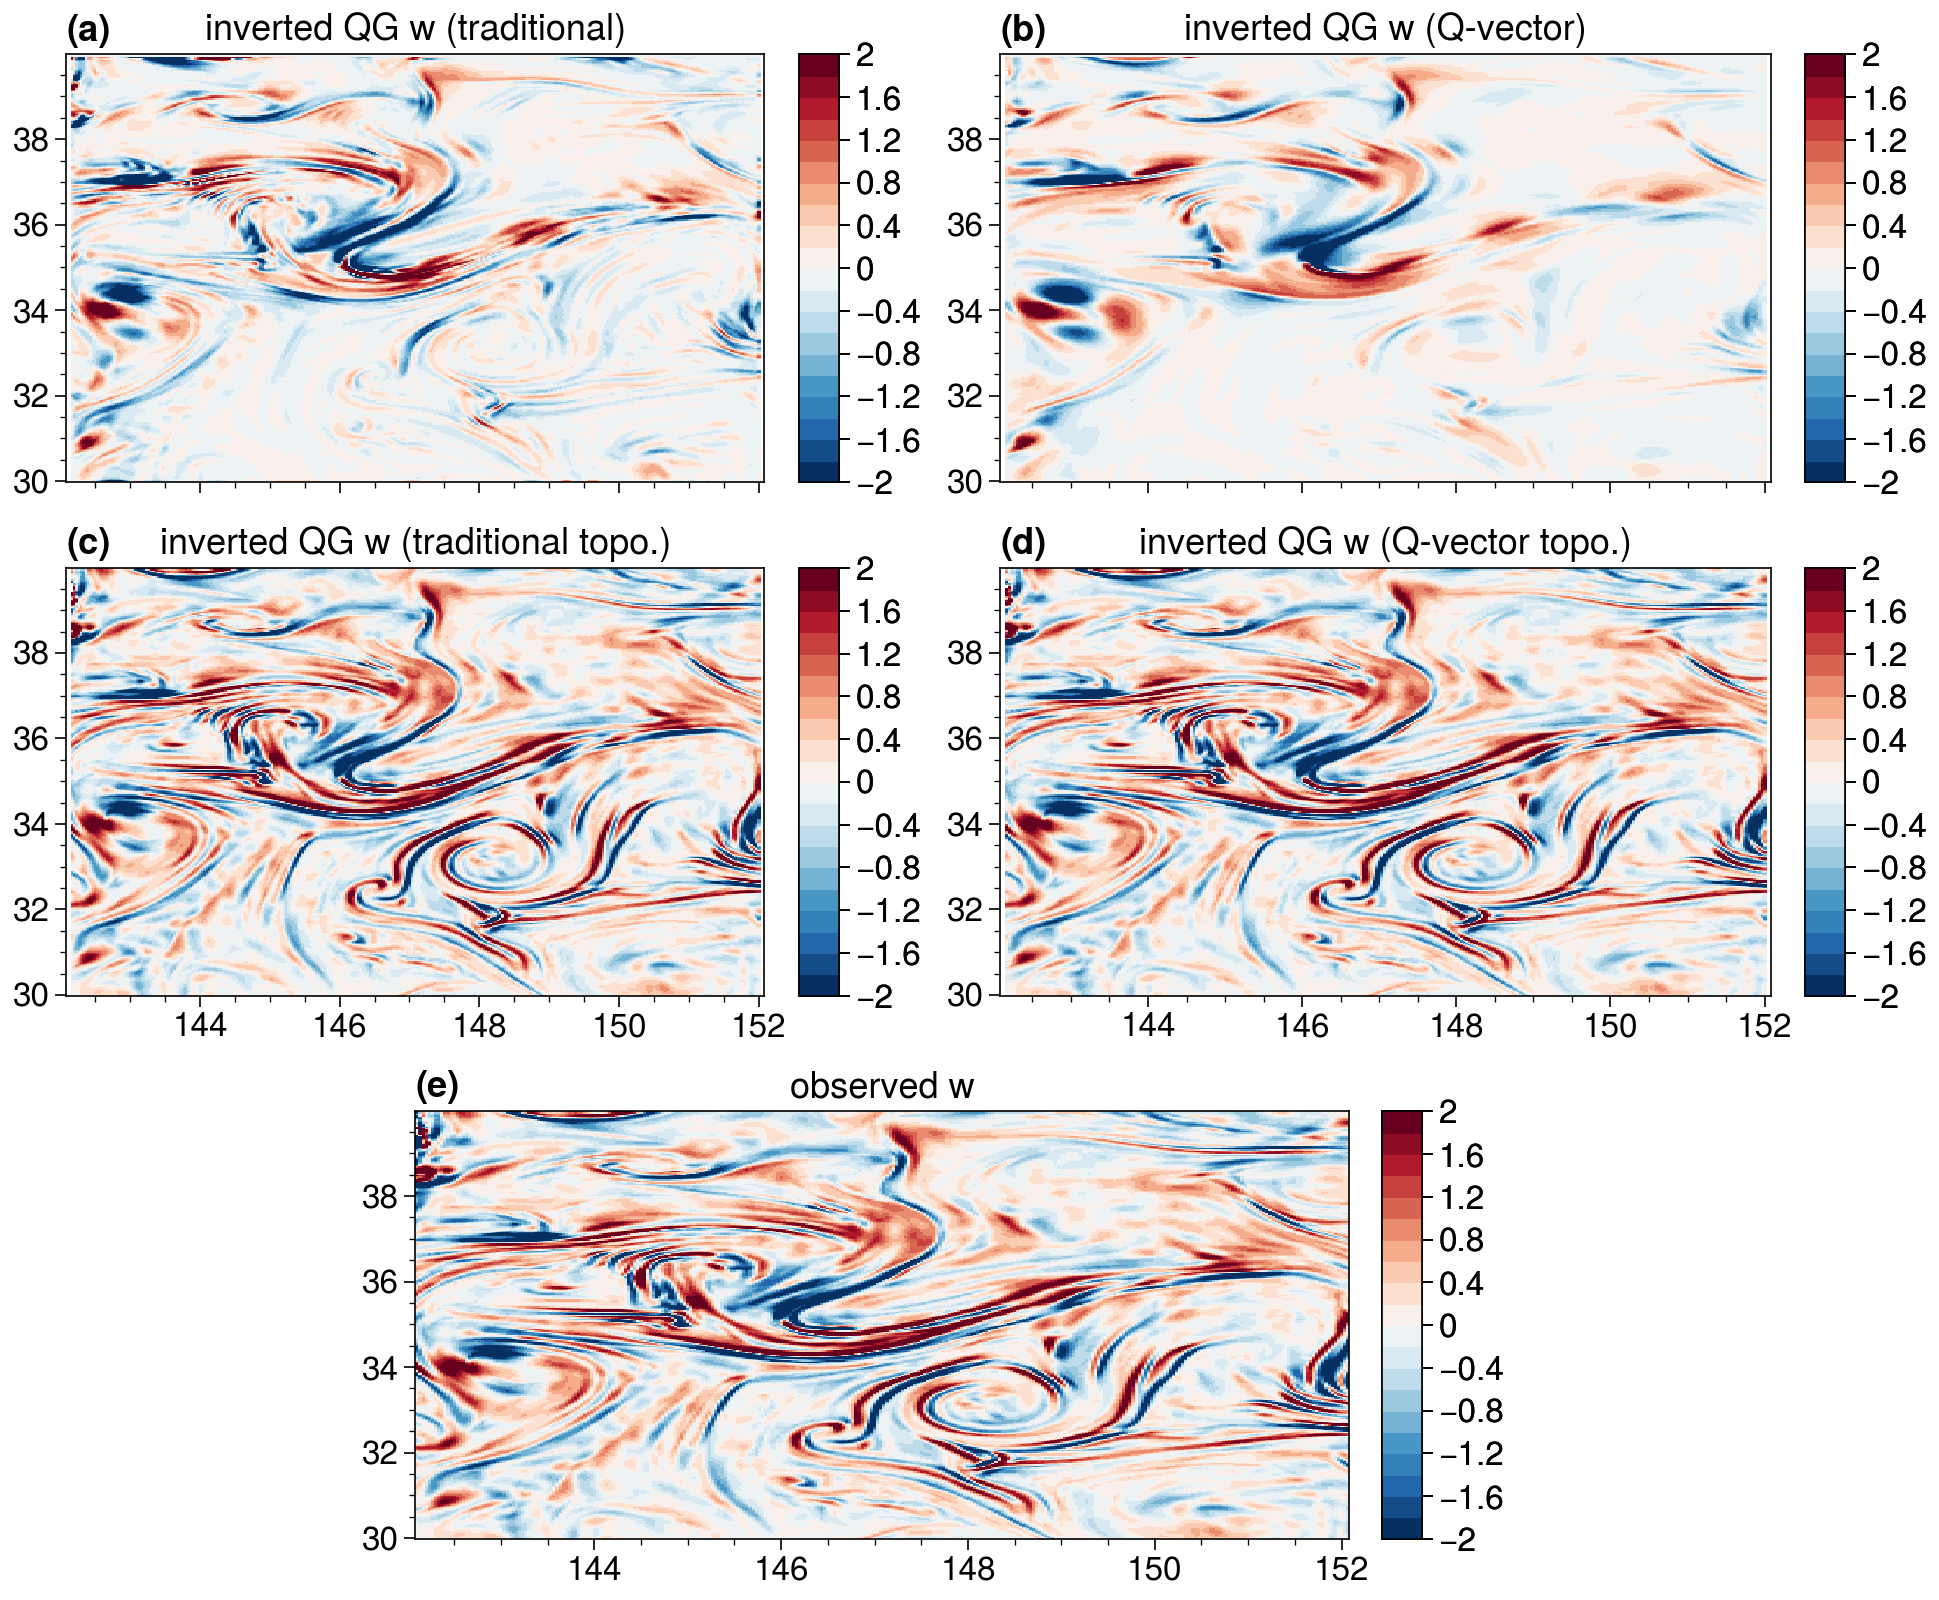

In [10]:
#%% plot and compare
import proplot as pplt
%matplotlib inline

fontsize = 16
array = [[1,1,2,2], [3,3,4,4], [0,5,5,0]]
z = 10 # choose subsurface to show

fig, axes = pplt.subplots(array, figsize=(9.7, 8), sharey=0)

ax = axes[0]
m=ax.pcolormesh(W1[z]*1e4, levels=np.linspace(-2, 2, 21), cmap='RdBu_r')
ax.set_title('inverted QG w (traditional)')
ax.colorbar(m, loc='r', label='')

ax = axes[1]
m=ax.pcolormesh(W2[z]*1e4, levels=np.linspace(-2, 2, 21), cmap='RdBu_r')
ax.set_title('inverted QG w (Q-vector)')
ax.colorbar(m, loc='r', label='')

ax = axes[2]
m=ax.pcolormesh(W1t[z]*1e4, levels=np.linspace(-2, 2, 21), cmap='RdBu_r')
ax.set_title('inverted QG w (traditional topo.)')
ax.colorbar(m, loc='r', label='')

ax = axes[3]
m=ax.pcolormesh(W2t[z]*1e4, levels=np.linspace(-2, 2, 21), cmap='RdBu_r')
ax.set_title('inverted QG w (Q-vector topo.)')
ax.colorbar(m, loc='r', label='')

ax = axes[4]
m=ax.pcolormesh(w[z]*1e4, levels=np.linspace(-2, 2, 21), cmap='RdBu_r')
ax.set_title('observed w')
ax.colorbar(m, loc='r', label='')

axes.format(abc='(a)', xlabel='', ylabel='')

It is clear that the adiabatic QG forcings reproduce much of the vertical motion pattern.  One may also need diabatic and frictional forcings to make it better.

---

### References
1. Hoskins, B. J., I. Draghici, and H. C. Davies, 1978: [A new look at the ω-equation.](https://rmets.onlinelibrary.wiley.com/doi/abs/10.1002/qj.49710443903) *Q. J. R. Meteorol. Soc.*, **104**, 31-38.
2. Liu, Lei,, H. Xue, and H. Sasaki, 2021: [Diagnosing Subsurface Vertical Velocities from High-Resolution Sea Surface Fields.](https://journals.ametsoc.org/view/journals/phoc/51/5/JPO-D-20-0152.1.xml) *J. Phys. Oceanogr.*, **51**, 1353–1373.

